# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [4]:
# install opencv if you haven't
!pip install opencv-python
!pip install pillow

In [ ]:
!pip install keras
!pip install tensorflow

In [7]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
# from scipy.misc.pilutil import imread
from imageio import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [8]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [9]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [51]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

C:\Users\rdlor\AppData\Local\Temp\ipykernel_14192\1036286552.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(img_path))


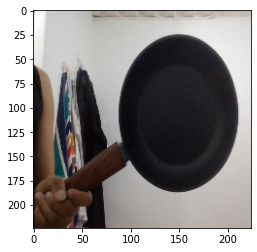

In [52]:
plt.imshow(imread(img_path))

In [55]:
img_path_2 = "webcam_test_img_2.png"

if save_webcam_image(img_path_2) is False:
    # Webcam not active, use the Dog Image
    img_path_2 = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path_2))

C:\Users\rdlor\AppData\Local\Temp\ipykernel_14192\2375140319.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(img_path_2))


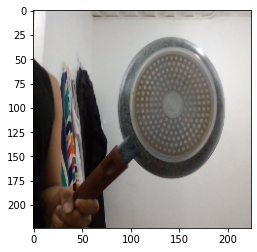

In [56]:
plt.imshow(imread(img_path_2))

In [62]:
img_path_3 = "webcam_test_img_3.png"

if save_webcam_image(img_path_3) is False:
    # Webcam not active, use the Dog Image
    img_path_3 = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path_3))

C:\Users\rdlor\AppData\Local\Temp\ipykernel_14192\680036105.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(img_path_3))


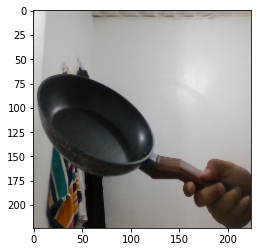

In [63]:
plt.imshow(imread(img_path_3))

---
Use VGG-16 pre-trained model

In [25]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 430s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [53]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [54]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


,Predicted Class,Name,Probability
0,n04597913,wooden_spoon,0.272773
1,n03876231,paintbrush,0.166960
2,n03970156,plunger,0.124586
3,n03400231,frying_pan,0.078292
4,n04270147,spatula,0.063477
5,n03250847,drumstick,0.057601
6,n03633091,ladle,0.048385
7,n04596742,wok,0.034899
8,n04554684,washer,0.013869
9,n03249569,drum,0.008887


In [57]:
predict_image(vgg16_model, img_path_2, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


,Predicted Class,Name,Probability
0,n04332243,strainer,0.202137
1,n04270147,spatula,0.151527
2,n04597913,wooden_spoon,0.117631
3,n03633091,ladle,0.099305
4,n03876231,paintbrush,0.094810
5,n03424325,gasmask,0.052949
6,n03041632,cleaver,0.026427
7,n03481172,hammer,0.017494
8,n03400231,frying_pan,0.015702
9,n03483316,hand_blower,0.014935


In [65]:
predict_image(vgg16_model, img_path_3, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


,Predicted Class,Name,Probability
0,n03400231,frying_pan,0.183381
1,n03633091,ladle,0.152290
2,n04596742,wok,0.089328
3,n03970156,plunger,0.084162
4,n02951585,can_opener,0.065982
5,n04597913,wooden_spoon,0.036441
6,n04332243,strainer,0.031863
7,n03692522,loupe,0.028123
8,n03786901,mortar,0.026501
9,n04270147,spatula,0.024051


Interpret the result of prediction using VGG16 model

- I've taken three pictures of my object, a small frying pan, from various perspectives. Based on the output of vgg16 and my initial image, which was taken of the pan's coating section, the wooden spoon was determined to have the highest probability of being my object. After that, in the second image, I attempted to center my image on the pan's ground base, but the vgg16 model once more is unable to recognize it, classifying it only as a strainer with a low probability of pan, which is worse than the first image. Lastly, however, I tried to tilt my pan slightly and hold it on the opposite side on my third image. Surprisingly, the vgg16 was able to correctly identify my object with the highest probability of 18.3% among the others.

---
Use Resnet50 pretrained model

In [66]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 53s 1us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [67]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


,Predicted Class,Name,Probability
0,n04597913,wooden_spoon,0.290359
1,n03400231,frying_pan,0.267813
2,n04596742,wok,0.114933
3,n03447721,gong,0.089105
4,n03970156,plunger,0.073904
5,n04270147,spatula,0.047647
6,n03250847,drumstick,0.031466
7,n03249569,drum,0.020911
8,n03633091,ladle,0.013381
9,n03017168,chime,0.013334


In [68]:
predict_image(resnet50_model, img_path_2, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


,Predicted Class,Name,Probability
0,n04332243,strainer,0.440680
1,n03447721,gong,0.303366
2,n03759954,microphone,0.062604
3,n03483316,hand_blower,0.023918
4,n03017168,chime,0.021004
5,n03250847,drumstick,0.018313
6,n03481172,hammer,0.017364
7,n04597913,wooden_spoon,0.015141
8,n04311174,steel_drum,0.012903
9,n04554684,washer,0.010045


In [69]:
predict_image(resnet50_model, img_path_3, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


,Predicted Class,Name,Probability
0,n04596742,wok,0.679409
1,n03400231,frying_pan,0.142310
2,n03633091,ladle,0.043749
3,n04270147,spatula,0.032993
4,n04597913,wooden_spoon,0.024356
5,n04023962,punching_bag,0.019753
6,n04332243,strainer,0.011888
7,n03970156,plunger,0.011306
8,n03775546,mixing_bowl,0.005914
9,n03786901,mortar,0.003469


Interpret the result using RESNET50 pretrained model

- Moving on to the ResNet50 model, I was surprised to see that the first and third images had a fairly good probability of correctly identifying as frying pans, even though my results from vgg16 still have the best numbers. Furthermore, the resnet50 model on my second image was unsuccessful to correctly identify it out of the ten objects.

---
Using InceptionV3 pretrained model

In [131]:
from keras.applications import inception_v3

inceptionv3_model = inception_v3.InceptionV3(weights='imagenet')
inceptionv3_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)   │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_294 (Conv2D)           │ (None, 149, 149, 32)      │             864 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_294       │ (None, 149, 149, 32)      │              96 │ conv2d_294[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_282 (Activation)   │ (None, 149, 149, 32)      │               0 │ batch_normalization_294[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_295 (Conv2D)           │ (None, 147, 147, 32)      │           9,216 │ activation_282[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_295       │ (None, 147, 147, 32)      │              96 │ conv2d_295[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_283 (Activation)   │ (None, 147, 147, 32)      │               0 │ batch_normalization_295[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_296 (Conv2D)           │ (None, 147, 147, 64)      │          18,432 │ activation_283[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_296       │ (None, 147, 147, 64)      │             192 │ conv2d_296[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_284 (Activation)   │ (None, 147, 147, 64)      │               0 │ batch_normalization_296[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 73, 73, 64)        │               0 │ activation_284[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_297 (Conv2D)           │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d_12[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_297       │ (None, 73, 73, 80)        │             240 │ conv2d_297[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_285 (Activation)   │ (None, 73, 73, 80)        │               0 │ batch_normalization_297[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_298 (Conv2D)           │ (None, 71, 71, 192)       │         138,24

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [140]:
predict_image(inceptionv3_model, img_path, inception_v3.preprocess_input, inception_v3.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


,Predicted Class,Name,Probability
0,n03400231,frying_pan,0.763654
1,n02790996,barbell,0.054108
2,n03970156,plunger,0.035866
3,n04596742,wok,0.020759
4,n03691459,loudspeaker,0.005346
5,n03447721,gong,0.003705
6,n03255030,dumbbell,0.002634
7,n03259280,Dutch_oven,0.002428
8,n04192698,shield,0.001666
9,n04270147,spatula,0.001531


In [141]:
predict_image(inceptionv3_model, img_path_2, inception_v3.preprocess_input, inception_v3.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


,Predicted Class,Name,Probability
0,n04332243,strainer,0.151368
1,n03400231,frying_pan,0.074681
2,n03424325,gasmask,0.049958
3,n03483316,hand_blower,0.049554
4,n04542943,waffle_iron,0.042111
5,n03447721,gong,0.037742
6,n03759954,microphone,0.020397
7,n03920288,Petri_dish,0.013642
8,n03720891,maraca,0.012446
9,n04596742,wok,0.011544


In [142]:
predict_image(inceptionv3_model, img_path_3, inception_v3.preprocess_input, inception_v3.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


,Predicted Class,Name,Probability
0,n03400231,frying_pan,0.492784
1,n04596742,wok,0.447649
2,n04270147,spatula,0.001413
3,n04023962,punching_bag,0.001167
4,n03970156,plunger,0.000734
5,n04330267,stove,0.000545
6,n03062245,cocktail_shaker,0.000519
7,n03297495,espresso_maker,0.000419
8,n02939185,caldron,0.000388
9,n03742115,medicine_chest,0.000311


---
Using Xception pretrained model

In [144]:
from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)   │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer_20[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_388 (Conv2D)           │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [143]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


,Predicted Class,Name,Probability
0,n03400231,frying_pan,0.763654
1,n02790996,barbell,0.054108
2,n03970156,plunger,0.035866
3,n04596742,wok,0.020759
4,n03691459,loudspeaker,0.005346
5,n03447721,gong,0.003705
6,n03255030,dumbbell,0.002634
7,n03259280,Dutch_oven,0.002428
8,n04192698,shield,0.001666
9,n04270147,spatula,0.001531


In [148]:
predict_image(xception_model, img_path_2, xception.preprocess_input, xception.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


,Predicted Class,Name,Probability
0,n03483316,hand_blower,0.407441
1,n03447721,gong,0.119181
2,n03720891,maraca,0.044746
3,n04332243,strainer,0.044442
4,n03424325,gasmask,0.042727
5,n03400231,frying_pan,0.026037
6,n04596742,wok,0.011965
7,n03759954,microphone,0.011523
8,n03017168,chime,0.009271
9,n03633091,ladle,0.008640


In [146]:
predict_image(xception_model, img_path_3, xception.preprocess_input, xception.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


,Predicted Class,Name,Probability
0,n03400231,frying_pan,0.569152
1,n04596742,wok,0.381862
2,n04270147,spatula,0.014388
3,n03633091,ladle,0.001680
4,n04597913,wooden_spoon,0.001586
5,n03970156,plunger,0.000987
6,n03720891,maraca,0.000758
7,n03259280,Dutch_oven,0.000686
8,n03733805,measuring_cup,0.000468
9,n04208210,shovel,0.000291


---
Using DenseNet121 pretrained model

In [195]:
from keras.applications import densenet

densenet121_model = densenet.DenseNet121(weights='imagenet')
densenet121_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 230, 230, 3)       │               0 │ input_layer_24[0][0]       │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 8,062,504 (30.76 MB)

 Trainable params: 7,978,856 (30.44 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [197]:
predict_image(densenet121_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


,Predicted Class,Name,Probability
0,n03970156,plunger,0.182565
1,n03400231,frying_pan,0.181686
2,n04596742,wok,0.153109
3,n03447721,gong,0.101493
4,n03249569,drum,0.047265
5,n02817516,bearskin,0.043290
6,n02939185,caldron,0.027640
7,n03691459,loudspeaker,0.022584
8,n04311174,steel_drum,0.020661
9,n04259630,sombrero,0.018845


In [198]:
predict_image(densenet121_model, img_path_2, xception.preprocess_input, xception.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


,Predicted Class,Name,Probability
0,n04332243,strainer,0.911956
1,n03447721,gong,0.054463
2,n03483316,hand_blower,0.008964
3,n03633091,ladle,0.003174
4,n03017168,chime,0.002489
5,n04596742,wok,0.002381
6,n03400231,frying_pan,0.002036
7,n03759954,microphone,0.001477
8,n04270147,spatula,0.001414
9,n04597913,wooden_spoon,0.001246


In [199]:
predict_image(densenet121_model, img_path_3, xception.preprocess_input, xception.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


,Predicted Class,Name,Probability
0,n04596742,wok,0.410170
1,n03400231,frying_pan,0.408732
2,n04270147,spatula,0.050452
3,n03633091,ladle,0.028988
4,n04332243,strainer,0.024952
5,n03970156,plunger,0.019723
6,n04553703,washbasin,0.012429
7,n04597913,wooden_spoon,0.012029
8,n03775546,mixing_bowl,0.004606
9,n03786901,mortar,0.004468


#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [189]:
object_path = "object_img.png"
save_webcam_image(object_path)

True

C:\Users\rdlor\AppData\Local\Temp\ipykernel_14192\3597794524.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(object_path))


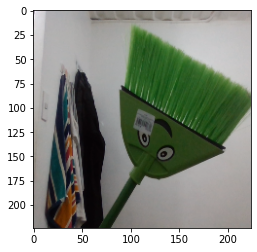

In [190]:
plt.imshow(imread(object_path))

In [191]:
predict_image(vgg16_model, object_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


,Predicted Class,Name,Probability
0,n03876231,paintbrush,0.783168
1,n02906734,broom,0.185566
2,n03908714,pencil_sharpener,0.011559
3,n04116512,rubber_eraser,0.003115
4,n04367480,swab,0.001753
5,n04033901,quill,0.001676
6,n03908618,pencil_box,0.001421
7,n03314780,face_powder,0.001323
8,n02783161,ballpoint,0.000761
9,n04548362,wallet,0.000668


In [192]:
predict_image(resnet50_model, object_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


,Predicted Class,Name,Probability
0,n03876231,paintbrush,8.671588e-01
1,n02906734,broom,1.328409e-01
2,n04367480,swab,1.561049e-07
3,n04067472,reel,9.745009e-08
4,n04208210,shovel,1.454180e-08
5,n03908714,pencil_sharpener,8.517645e-09
6,n02879718,bow,1.554534e-09
7,n04517823,vacuum,1.086669e-09
8,n03314780,face_powder,7.209054e-10
9,n04116512,rubber_eraser,5.807562e-10


In [193]:
predict_image(inceptionv3_model, object_path, inception_v3.preprocess_input, inception_v3.decode_predictions, target_size=(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


,Predicted Class,Name,Probability
0,n02906734,broom,0.891320
1,n03876231,paintbrush,0.107697
2,n07753113,fig,0.000391
3,n03314780,face_powder,0.000027
4,n01532829,house_finch,0.000014
5,n04417672,thatch,0.000005
6,n07730033,cardoon,0.000004
7,n01514668,cock,0.000004
8,n07718747,artichoke,0.000003
9,n02116738,African_hunting_dog,0.000003


In [194]:
predict_image(xception_model, object_path, xception.preprocess_input, xception.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


,Predicted Class,Name,Probability
0,n02906734,broom,0.823377
1,n03876231,paintbrush,0.142562
2,n04367480,swab,0.011597
3,n03532672,hook,0.002000
4,n04208210,shovel,0.001656
5,n04517823,vacuum,0.001101
6,n04116512,rubber_eraser,0.000681
7,n02840245,binder,0.000535
8,n03908714,pencil_sharpener,0.000517
9,n04039381,racket,0.000427


In [200]:
predict_image(densenet121_model, object_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


,Predicted Class,Name,Probability
0,n03876231,paintbrush,0.595015
1,n02906734,broom,0.403176
2,n04367480,swab,0.001528
3,n03908714,pencil_sharpener,0.000086
4,n04033901,quill,0.000059
5,n04208210,shovel,0.000018
6,n03970156,plunger,0.000014
7,n03908618,pencil_box,0.000008
8,n04517823,vacuum,0.000006
9,n04154565,screwdriver,0.000005


---
- Vgg16 - broom - 18.6%
- ResNet50 - broom - 13.3%
- InceptionV3 - broom - 89.1%
- Xception - broom - 82.3%
- DenseNet121 - broom - 40.3%

#### Conclusion

My broom object has produced a fairly mixed set of results when tested on five different types of pre-trained models. With a probability percentage of 89.1%, the InceptionV3 model outperforms the other four models—vgg16, resnet50, xception, and densenet121—in correctly classifying my object as a broom. With the exception of Inceptionv3 and Xception, which have the same sound, none of the other models even have the broom as their primary object recognition feature. However, this is acceptable because all of the other models are in the second highest position. 

Overall, I had fun with this exercise. I was surprised to find that there are a lot of pre-trained models available online, some of which are just more complex versions of the models that are already here, such as the densenet and resnet. Furthermore, I discovered that every model has a unique method for identifying objects, and that the angle of the object can have significant effects on the accuracy of a model.